In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D, GlobalAveragePooling1D
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow import keras
# Load dữ liệu từ file CSV (ví dụ)
df = pd.read_csv('BIDV.csv')
df1=df.reset_index()['Price']
df1.describe

# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

# 4. Chia train test
train_size = int(0.7 * len(df1))
test_size = len(df1) - train_size

train_data = df1[:train_size]
test_data = df1[train_size:]


# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100
time_step = 30
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)


# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0],X_train.shape[1], 1)
X_train, y_train

(array([[[0.07418187],
         [0.06248662],
         [0.04786633],
         ...,
         [0.04786633],
         [0.04786633],
         [0.05078893]],
 
        [[0.06248662],
         [0.04786633],
         [0.05371396],
         ...,
         [0.04786633],
         [0.05078893],
         [0.05956159]],
 
        [[0.04786633],
         [0.05371396],
         [0.05225145],
         ...,
         [0.05078893],
         [0.05956159],
         [0.06394913]],
 
        ...,
 
        [[0.56839021],
         [0.56365468],
         [0.57028345],
         ...,
         [0.66687027],
         [0.68770319],
         [0.70380059]],
 
        [[0.56365468],
         [0.57028345],
         [0.58543423],
         ...,
         [0.68770319],
         [0.70380059],
         [0.72084461]],
 
        [[0.57028345],
         [0.58543423],
         [0.58354099],
         ...,
         [0.70380059],
         [0.72084461],
         [0.71516489]]]),
 array([0.05956159, 0.06394913, 0.0610241 , ..., 0.7208

In [2]:

# define FCN model
def fcn():
    model = Sequential()
    model.add(Conv1D(filters=512, kernel_size=3, activation='relu', input_shape=(time_step, 1)))
    model.add(Conv1D(filters=256, kernel_size=3, activation='relu'))
    model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
    model.add(GlobalAveragePooling1D())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1))
    return model
  # Thay thế window_size và num_features bằng giá trị thích hợp
# Tạo mô hình FCN
model= fcn()
# Compile mô hình
model.compile(optimizer='adam', loss='mean_squared_error')
# Huấn luyện mô hình
model.fit(X_train, y_train, epochs=100, batch_size=64, verbose=1)




Epoch 1/100

27/27 [==============================] - 2s 15ms/step - loss: 0.0189
Epoch 2/100
27/27 [==============================] - 0s 15ms/step - loss: 0.0025
Epoch 3/100
27/27 [==============================] - 0s 14ms/step - loss: 0.0023
Epoch 4/100
27/27 [==============================] - 0s 15ms/step - loss: 0.0024
Epoch 5/100
27/27 [==============================] - 0s 14ms/step - loss: 0.0023
Epoch 6/100
27/27 [==============================] - 0s 15ms/step - loss: 0.0025
Epoch 7/100
27/27 [==============================] - 0s 17ms/step - loss: 0.0028
Epoch 8/100
27/27 [==============================] - 0s 14ms/step - loss: 0.0023
Epoch 9/100
27/27 [==============================] - 0s 15ms/step - loss: 0.0021
Epoch 10/100
27/27 [==============================] - 0s 17ms/step - loss: 0.0025
Epoch 11/100
27/27 [==============================] - 0s 16ms/step - loss: 0.0021
Epoch 12/100
27/27 [==============================] - 0s 15ms/step - loss: 0.0025
Epoch 13/100
27/27 [==

27/27 [==============================] - 1s 26ms/step - loss: 5.1597e-04
Epoch 92/100
27/27 [==============================] - 1s 26ms/step - loss: 4.3707e-04
Epoch 93/100
27/27 [==============================] - 1s 26ms/step - loss: 4.0839e-04
Epoch 94/100
27/27 [==============================] - 1s 25ms/step - loss: 5.3779e-04
Epoch 95/100
27/27 [==============================] - 1s 26ms/step - loss: 4.4764e-04
Epoch 96/100
27/27 [==============================] - 1s 26ms/step - loss: 4.4732e-04
Epoch 97/100
27/27 [==============================] - 1s 26ms/step - loss: 5.2072e-04
Epoch 98/100
27/27 [==============================] - 1s 26ms/step - loss: 4.1984e-04
Epoch 99/100
27/27 [==============================] - 1s 26ms/step - loss: 3.9737e-04
Epoch 100/100
27/27 [==============================] - 1s 25ms/step - loss: 5.9485e-04


In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 28, 512)           2048      
                                                                 
 conv1d_1 (Conv1D)           (None, 26, 256)           393472    
                                                                 
 conv1d_2 (Conv1D)           (None, 24, 128)           98432     
                                                                 
 conv1d_3 (Conv1D)           (None, 22, 64)            24640     
                                                                 
 conv1d_4 (Conv1D)           (None, 20, 32)            6176      
                                                                 
 global_average_pooling1d (  (None, 32)                0         
 GlobalAveragePooling1D)                                         
                                                        

In [4]:
# Dự báo
test_predict = model.predict(X_test)
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])
test_predict

23/23 [==============================] - 0s 9ms/step


array([[33931.7  ],
       [34329.164],
       [34605.598],
       [34419.582],
       [34222.418],
       [34679.62 ],
       [35484.332],
       [36406.453],
       [37226.188],
       [37547.312],
       [37110.332],
       [36581.285],
       [35693.297],
       [35109.6  ],
       [35196.117],
       [35660.562],
       [36046.02 ],
       [35870.445],
       [35685.96 ],
       [35593.547],
       [35441.086],
       [35162.008],
       [34860.117],
       [34638.84 ],
       [34418.668],
       [34111.273],
       [34072.547],
       [34274.484],
       [34936.316],
       [36038.004],
       [37150.418],
       [38076.137],
       [38602.125],
       [38263.008],
       [37408.516],
       [36936.375],
       [36884.26 ],
       [36779.38 ],
       [36099.414],
       [34901.105],
       [34063.242],
       [34349.367],
       [34584.926],
       [34725.36 ],
       [34790.598],
       [34277.13 ],
       [33747.02 ],
       [33575.965],
       [33452.523],
       [33167.805],


In [5]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, mean_squared_log_error
def calculate_mda(y_true, y_pred):
    y_true_diff = np.diff(y_true)
    y_pred_diff = np.diff(y_pred)
    correct_direction = np.sign(y_true_diff) == np.sign(y_pred_diff)
    return np.mean(correct_direction) * 100

# Tính toán RMSE, MAE và MAPE trên tập test
test_score_rmse = np.sqrt(mean_squared_error(y_test[0], test_predict[:, 0]))
test_score_mape = mean_absolute_percentage_error(y_test[0], test_predict[:, 0]) * 100
test_score_mda = calculate_mda(y_test[0], test_predict[:, 0])
msle = mean_squared_log_error(y_test[0], test_predict[:, 0])

print('RMSE trên tập test là:', test_score_rmse)
print('MAPE trên tập test là:', test_score_mape, '%')
print('MDA trên tập test là:', test_score_mda, '%')
print('MSLE trên tập test là:', msle)


RMSE trên tập test là: 1812.1182356108832
MAPE trên tập test là: 3.804831230274567 %
MDA trên tập test là: 44.7887323943662 %
MSLE trên tập test là: 0.0022421444277167394


In [6]:
# Dự báo giá trị 30 ngày trong tương lai
last_30_days = df1[-30:]
next_30_days = []
for i in range(30):
    x = last_30_days[-time_step:].reshape(1, time_step, 1)
    y_hat = model.predict(x)
    next_30_days.append(y_hat)
    last_30_days = np.append(last_30_days, y_hat, axis=0)

next_30_days = np.array(next_30_days).reshape(-1, 1)
next_30_days = scaler.inverse_transform(next_30_days)

print(next_30_days)

1/1 [==============================] - 0s 63ms/step
[[41451.87 ]
 [41438.984]
 [41834.25 ]
 [42542.516]
 [43112.523]
 [43543.125]
 [43634.336]
 [43591.79 ]
 [43652.73 ]
 [43691.676]
 [43597.508]
 [43490.92 ]
 [43481.86 ]
 [43521.1  ]
 [43633.51 ]
 [43782.938]
 [43983.81 ]
 [44224.43 ]
 [44429.16 ]
 [44580.1  ]
 [44670.562]
 [44806.71 ]
 [45037.2  ]
 [45258.047]
 [45391.816]
 [45424.78 ]
 [45401.14 ]
 [45385.203]
 [45421.87 ]
 [45504.742]]


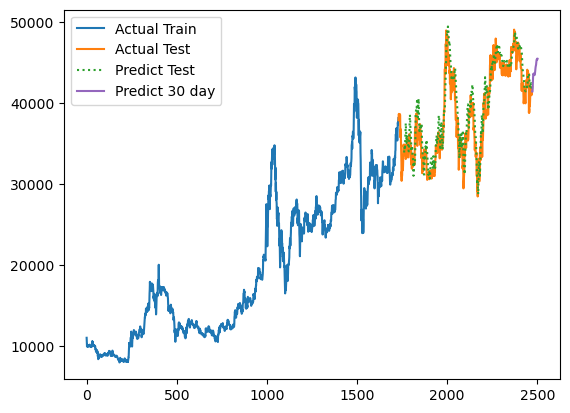

In [7]:
color_palette = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']
from matplotlib import pyplot as plt
# plt.figure(figsize=(12, 4))

# train

train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(train_data_index, scaler.inverse_transform(train_data), label="Actual Train")
# plt.plot([*train_range], pred_train.squeeze(), label="Predict Train", linestyle="dotted", color = color_palette[1])

# test
test_data_index = pd.RangeIndex(start=train_size, stop=train_size + test_size, step=1)
# test_range = range(len(y_true_train.squeeze()),len(y_true_train.squeeze()) + len(y_true_test.squeeze()))
plt.plot(test_data_index, scaler.inverse_transform(test_data), label="Actual Test")
test_data_index = pd.RangeIndex(start=train_size+31, stop=len(df1), step=1)
plt.plot(test_data_index, test_predict.squeeze(), label="Predict Test", linestyle="dotted")


#30 days
prediect_data_index = pd.RangeIndex(start=len(df1), stop=len(df1)+30, step=1)
plt.plot(prediect_data_index, next_30_days.squeeze(), label="Predict 30 day",color = color_palette[4])

# # Dự đoán 30 điểm tiếp theo
plt.legend()
plt.show()